In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
from yellowbrick.regressor import ResidualsPlot

In [2]:
dados = pd.read_csv('CarPrice_Assignment.csv')
dados.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
caros = dados.sort_values(by = 'price', ascending = False)
caros = caros.head(10)
caros

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
74,75,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0
16,17,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0
73,74,0,buick century special,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0
128,129,3,porsche boxter,gas,std,two,convertible,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207,5900,17,25,37028.0
17,18,0,bmw x3,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880.0
49,50,0,jaguar xk,gas,std,two,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0
48,49,0,jaguar xf,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,35550.0
72,73,3,buick skylark,gas,std,two,convertible,rwd,front,96.6,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,35056.0
71,72,-1,buick opel isuzu deluxe,gas,std,four,sedan,rwd,front,115.6,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,34184.0
127,128,3,porsche cayenne,gas,std,two,hardtop,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207,5900,17,25,34028.0


In [4]:
dados = dados.drop('car_ID',axis=1)

In [5]:
dados.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
dados['CarName'] = dados['CarName'].str.split(' ').str[0]

In [7]:
dados['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [8]:
dados['CarName'] = dados['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [9]:
dados['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [10]:
marca = dados['CarName']


In [11]:
col_categorica = ['fueltype','aspiration','carbody','drivewheel','enginetype','cylindernumber']

In [12]:
dados['fueltype'].isna().sum()

0

Text(0.5, 1.0, 'Preço dos carros')

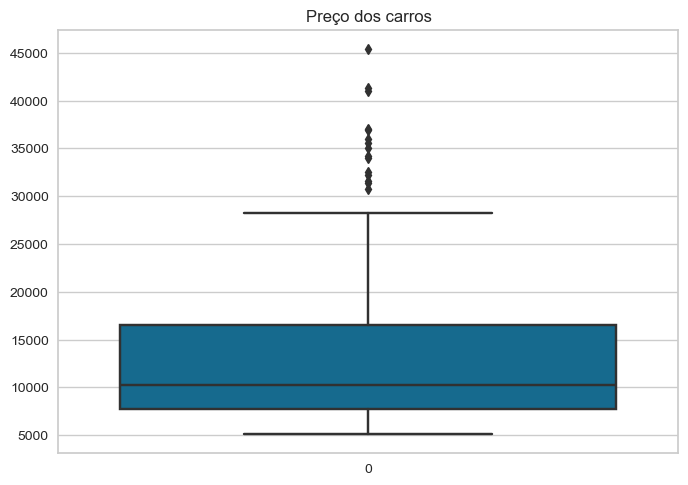

In [13]:
sns.boxplot(dados.price).set_title('Preço dos carros')

Text(0.5, 1.0, 'Marcas mais frequentes')

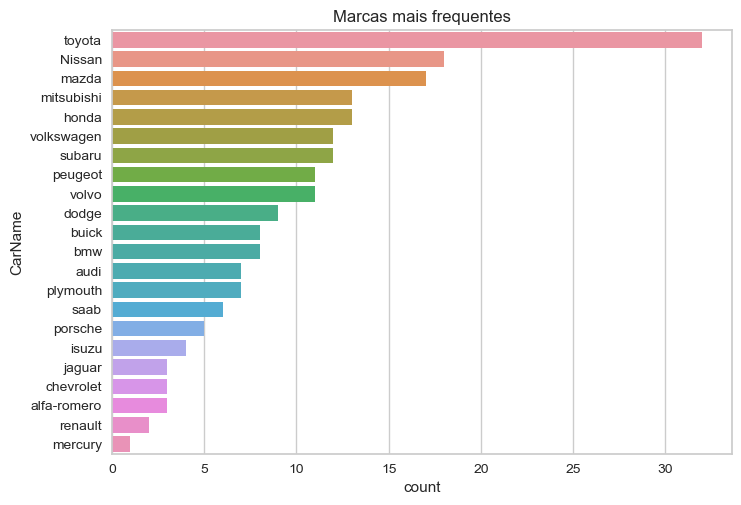

In [14]:
count =marca.value_counts().index
sns.countplot(y = marca, order =count).set_title('Marcas mais frequentes')

Text(0.5, 1.0, 'Proporção de tipos de combustível')

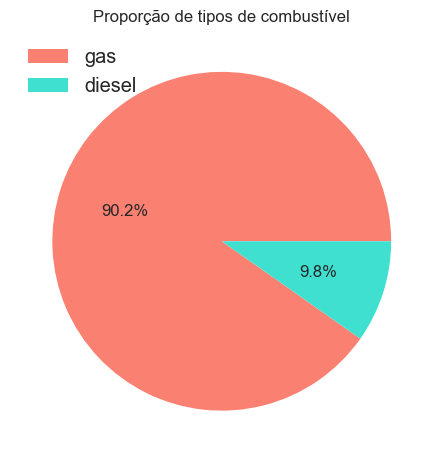

In [15]:
plt.pie(dados['fueltype'].value_counts(), autopct ='%1.1f%%', colors = ['salmon', 'turquoise']) 
plt.legend(dados['fueltype'].unique(), fontsize='large')
plt.title('Proporção de tipos de combustível')

<Axes: xlabel='carbody', ylabel='count'>

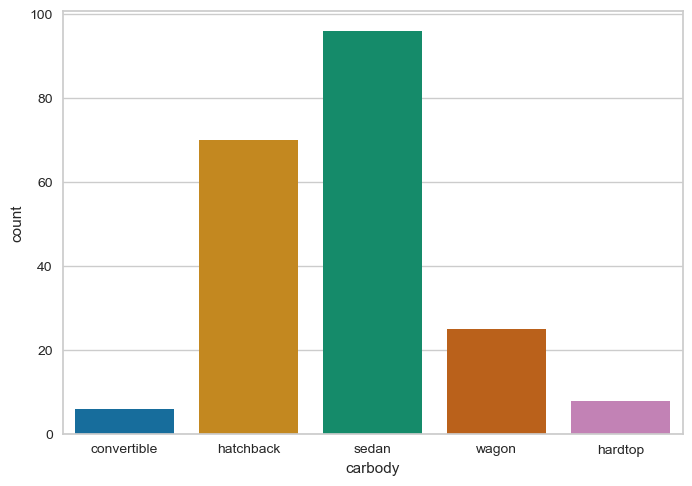

In [16]:
sns.countplot(data = dados, x = 'carbody', palette = 'colorblind')

Text(0.5, 1.0, 'Top 10 carros mais caros')

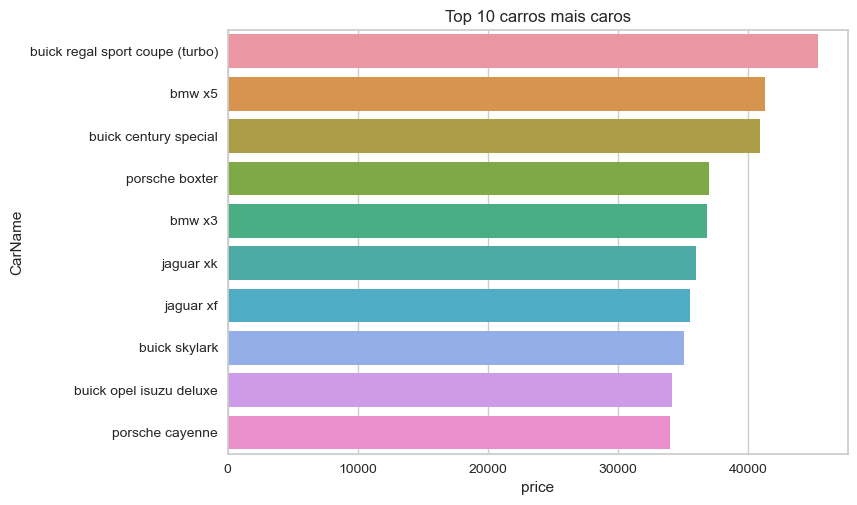

In [17]:
sns.barplot(data = caros, x = 'price', y = 'CarName').set_title('Top 10 carros mais caros')

In [18]:
dummies = pd.get_dummies(dados[col_categorica])
dummies.shape

(205, 26)

In [19]:
dummies = pd.get_dummies(dados[col_categorica], drop_first = True)
dummies.shape

(205, 20)

In [20]:
dados = pd.concat([dados, dummies], axis = 1)

In [21]:
dados.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,False,False,False,False,False,True,False,False,False,False
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,False,False,False,False,False,True,False,False,False,False
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,False,False,True,False,False,False,True,False,False,False
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,True,False,False,False,False,True,False,False,False,False
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,True,False,False,False,True,False,False,False,False,False


In [22]:
dados.drop( col_categorica, axis = 1, inplace = True)
dados.shape

(205, 39)

In [23]:
dados.head()

,symboling,CarName,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,3,alfa-romero,two,front,88.6,168.8,64.1,48.8,2548,130,...,False,False,False,False,False,True,False,False,False,False
1,3,alfa-romero,two,front,88.6,168.8,64.1,48.8,2548,130,...,False,False,False,False,False,True,False,False,False,False
2,1,alfa-romero,two,front,94.5,171.2,65.5,52.4,2823,152,...,False,False,True,False,False,False,True,False,False,False
3,2,audi,four,front,99.8,176.6,66.2,54.3,2337,109,...,True,False,False,False,False,True,False,False,False,False
4,2,audi,four,front,99.4,176.6,66.4,54.3,2824,136,...,True,False,False,False,True,False,False,False,False,False


In [24]:
col_numerica = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','price']

In [25]:
dados2 = dados[col_numerica]

In [26]:
dados2

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952,141,3.78,114,23,28,16845.0
201,109.1,188.8,68.8,3049,141,3.78,160,19,25,19045.0
202,109.1,188.8,68.9,3012,173,3.58,134,18,23,21485.0
203,109.1,188.8,68.9,3217,145,3.01,106,26,27,22470.0


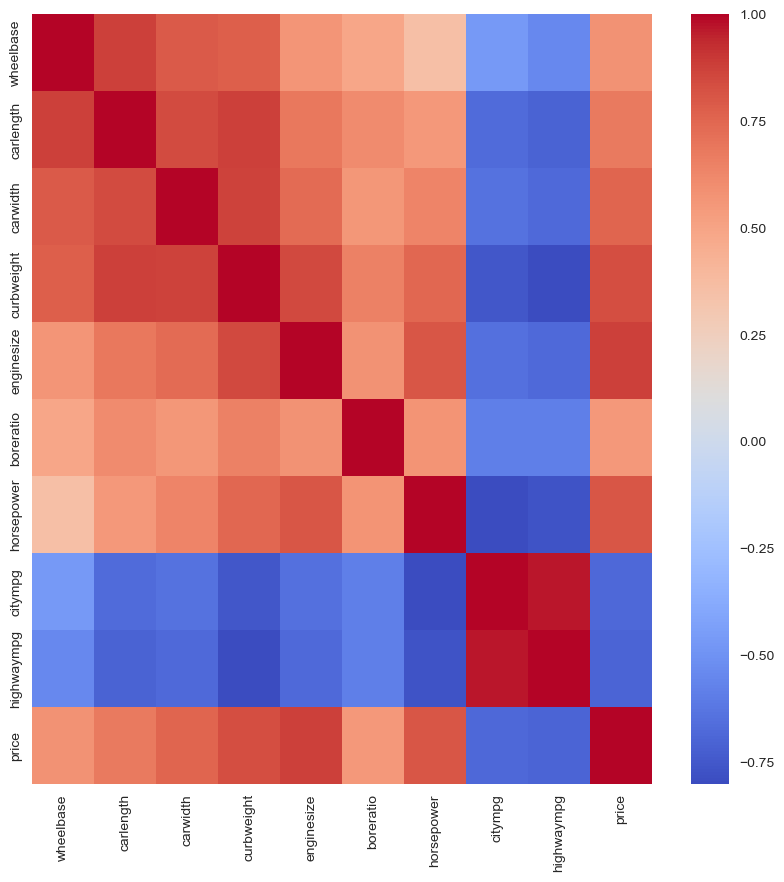

In [27]:
plt.figure(figsize = (10, 10))
sns.heatmap(dados2.corr(), cmap="coolwarm")
plt.show()

In [28]:
Y = dados2.iloc[: , 9].values

In [29]:
X1 = dados2.iloc[: , 6].values

In [30]:
X2 = dados2.iloc[: , 3].values

In [31]:
X3 = dados2.iloc[: , 4].values

In [32]:
X1 = X1.reshape(-1,1)

In [33]:
X2 = X2.reshape(-1,1)

In [34]:
X3 = X3.reshape(-1,1)

In [35]:
X = np.concatenate((X1 , X2 , X3), axis = 1)

In [36]:
modelo = LinearRegression()
modelo.fit(X, Y)

LinearRegression()

In [37]:
modelo.score(X, Y)

0.8138201347761838

In [38]:
previsao = modelo.predict(X)

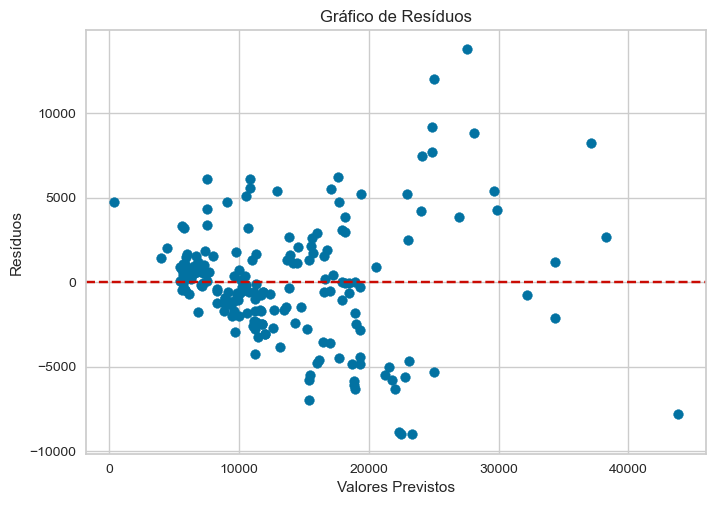

In [39]:
residuos = Y - modelo.predict(X)
plt.scatter(modelo.predict(X), residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos')
plt.show()

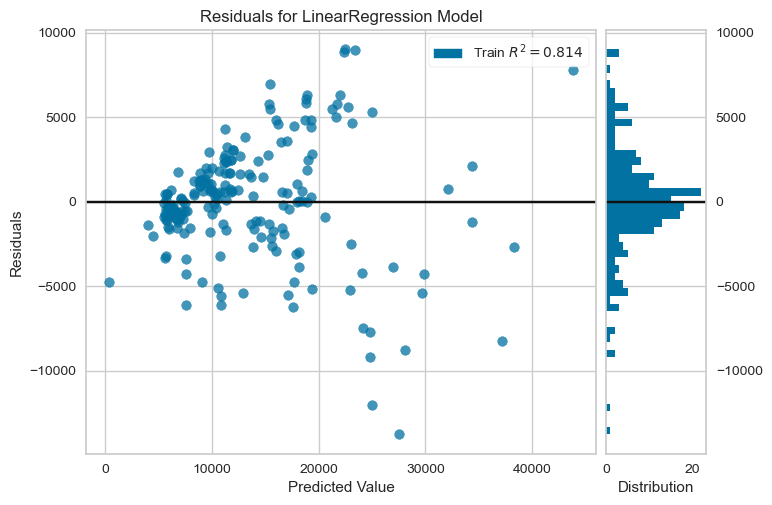

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [40]:
visualizador =  ResidualsPlot(modelo)
visualizador.fit(X,Y)
visualizador.poof()

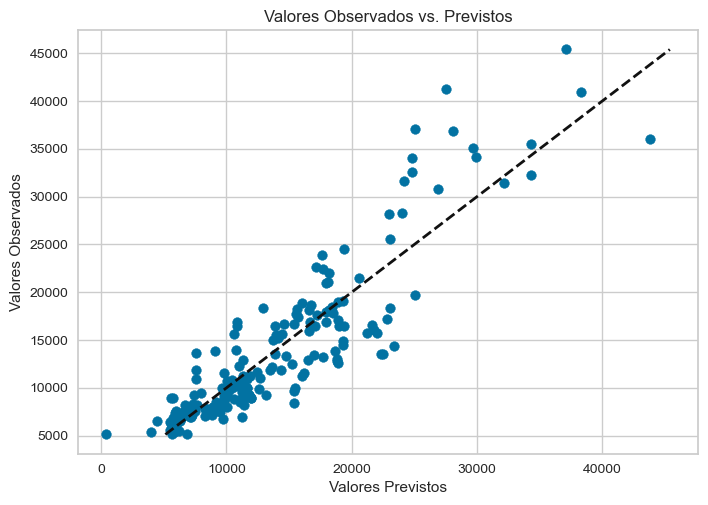

In [41]:
plt.scatter(modelo.predict(X), Y)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2)
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Observados')
plt.title('Valores Observados vs. Previstos')
plt.show()

In [42]:
modelo.predict([[115,2824,136]]) # previsão do preço de um audi 100ls(linha 4)

array([15723.22137477])